<a href="https://colab.research.google.com/github/SarveshVeginwar/Macine_learning/blob/main/ML_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('Mall_Customers.csv')

print(data.isnull().sum())

data = data.dropna()

X = data[['Age', 'Annual Income ($)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Data after scaling: \n", X_scaled[:5])


CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64
Data after scaling: 
 [[-1.052345   -2.08667453 -0.43185041]
 [-0.98194145 -1.65020484  1.06975542]
 [-1.01714323 -0.53720711 -1.61168357]
 [-0.9115379  -1.1264412   0.92674534]
 [-0.62992369 -1.58473438 -0.39609789]]


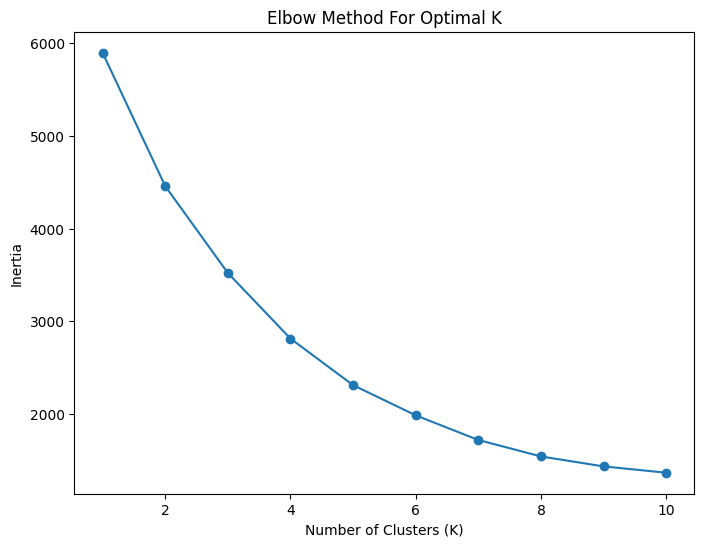

In [23]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans,DBSCAN

inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()


In [20]:
kmeans = KMeans(n_clusters=2, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

data['Cluster'] = y_kmeans

print(data.head())

   CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           1    Male   19              15000                      39   
1           2    Male   21              35000                      81   
2           3  Female   20              86000                       6   
3           4  Female   23              59000                      77   
4           5  Female   31              38000                      40   

      Profession  Work Experience  Family Size  Cluster  
0     Healthcare                1            4        0  
1       Engineer                3            3        1  
2       Engineer                1            1        0  
3         Lawyer                0            2        1  
4  Entertainment                2            6        0  


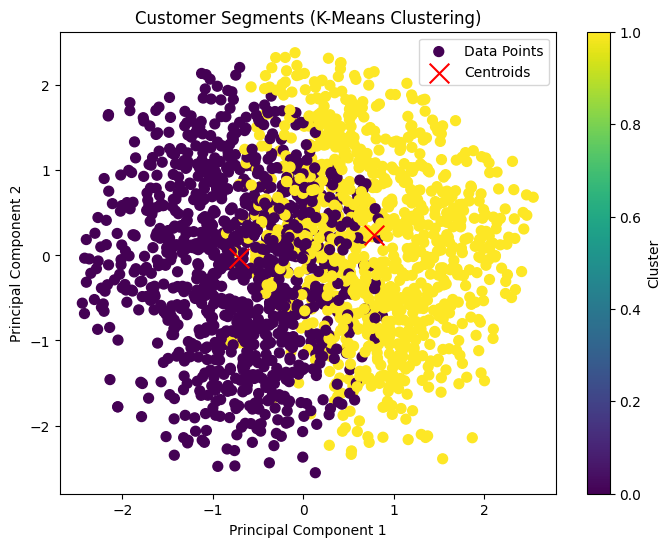

In [21]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

plt.figure(figsize=(8, 6))

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', s=50, label='Data Points')

centroids_pca = pca.transform(kmeans.cluster_centers_)

centroid_offset = 0.1

plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1] + centroid_offset, s=200, c='red', marker='x', label='Centroids')

plt.title('Customer Segments (K-Means Clustering)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.colorbar(label='Cluster')
plt.show()



In [10]:
print("Cluster Centers (Age, Annual Income, Spending Score):")
print(kmeans.cluster_centers_)


Cluster Centers (Age, Annual Income, Spending Score):
[[ 0.17130157 -0.04087131 -0.79646357]
 [-0.18832192  0.04493225  0.87559938]]


In [12]:
for i in range(2):
    print(f"Cluster {i} Summary:")
    print(data[data['Cluster'] == i].describe())


Cluster 0 Summary:
        CustomerID          Age  Annual Income ($)  Spending Score (1-100)  \
count  1024.000000  1024.000000        1024.000000             1024.000000   
mean   1002.964844    53.909180      108610.239258               28.716797   
std     580.054739    27.451665       46163.993128               15.750619   
min       1.000000     0.000000        2000.000000                0.000000   
25%     503.750000    32.000000       73347.000000               16.000000   
50%     995.500000    55.000000      104547.000000               29.000000   
75%    1515.250000    78.000000      148499.750000               42.000000   
max    2000.000000    99.000000      189974.000000               61.000000   

       Work Experience  Family Size  Cluster  
count      1024.000000  1024.000000   1024.0  
mean          4.261719     3.744141      0.0  
std           4.004379     1.994363      0.0  
min           0.000000     1.000000      0.0  
25%           1.000000     2.000000      0.

**Bonus**

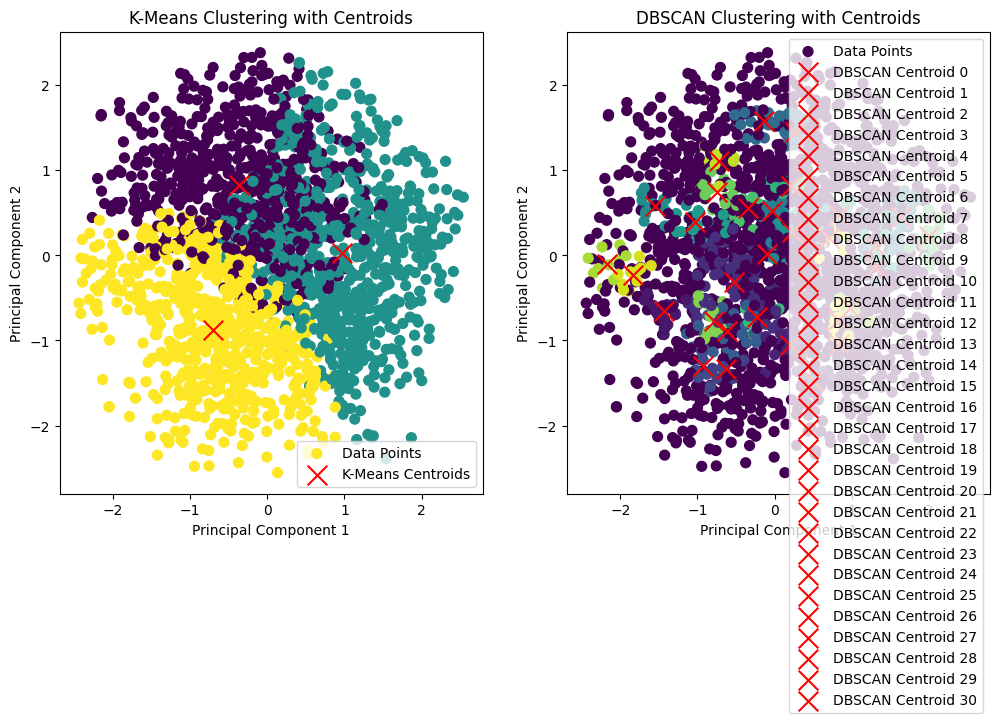

In [24]:
# Apply KMeans clustering (for comparison)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_clusters = kmeans.fit_predict(X_scaled)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=10)
dbscan_clusters = dbscan.fit_predict(X_scaled)

# Perform PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot K-Means clusters
plt.figure(figsize=(12, 6))

# K-Means Plot
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_clusters, cmap='viridis', s=50, label='Data Points')
centroids_pca = pca.transform(kmeans.cluster_centers_)  # Transform KMeans centroids to PCA space
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=200, c='red', marker='x', label='K-Means Centroids')
plt.title("K-Means Clustering with Centroids")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

# DBSCAN Plot
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_clusters, cmap='viridis', s=50, label='Data Points')

# Calculate approximate centroids for DBSCAN (mean of points in each cluster)
for cluster_id in set(dbscan_clusters):
    if cluster_id != -1:  # Exclude noise points (label -1)
        cluster_points = X_pca[dbscan_clusters == cluster_id]
        centroid = np.mean(cluster_points, axis=0)
        plt.scatter(centroid[0], centroid[1], s=200, c='red', marker='x', label=f'DBSCAN Centroid {cluster_id}')

plt.title("DBSCAN Clustering with Centroids")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

plt.show()